# Getting to know your data with Pandas

## What is Pandas

Pandas is Python Data Analysis Library. Pandas provides an R-like DataFrame, produces high quality plots with matplotlib, and integrates nicely with other libraries that expect NumPy arrays.

## Getting started

In [5]:
import pandas as pd
import pandas_datareader.data as web
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


from datetime import datetime

#pd.__version__

%matplotlib inline


## Fetching storing and retrieving your data

More information on what types of data you can fetch

http://pandas.pydata.org/pandas-docs/stable/remote_data.html

In [6]:
#yahoo data
#stocks = ['ORCL', 'TSLA', 'IBM','YELP', 'MSFT']
stocks = 'YELP'
#ls_key = 'Adj Close'

yahoo_stocks = web.get_data_yahoo(stocks)

#yahoo_stocks.head()
yahoo_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 997 entries, 2012-03-02 to 2016-02-18
Data columns (total 6 columns):
Open         997 non-null float64
High         997 non-null float64
Low          997 non-null float64
Close        997 non-null float64
Volume       997 non-null int64
Adj Close    997 non-null float64
dtypes: float64(5), int64(1)
memory usage: 54.5 KB


More on pandas data frames: 


http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html

#### Reading data from a .csv file

Some basic commands for reading and getting to know the characteristics of your data

In [12]:
yahoo_stocks.to_csv('yahoo_data.csv')
#print(open('yahoo_data.csv').read())
df = pd.read_csv('yahoo_data.csv')#, index_col='Date', infer_datetime_format=True, parse_dates=True)
print df.head()
print df.info()
print df.index
print df

         Date       Open       High        Low  Close   Volume  Adj Close
0  2012-03-02  22.010000  26.000000  22.000000  24.58  4809400      24.58
1  2012-03-05  24.850000  24.860001  20.900000  20.99  2988200      20.99
2  2012-03-06  19.830000  20.500000  19.360001  20.50  1154300      20.50
3  2012-03-07  20.450001  20.629999  19.950001  20.25   444800      20.25
4  2012-03-08  20.299999  20.389999  19.959999  20.00   436900      20.00
<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 996
Data columns (total 7 columns):
Date         997 non-null object
Open         997 non-null float64
High         997 non-null float64
Low          997 non-null float64
Close        997 non-null float64
Volume       997 non-null int64
Adj Close    997 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 62.3+ KB
None
Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            987, 988, 989, 990, 991, 992, 993, 994, 995, 996],
        

In [13]:
#The number of tuples in your data
print len(df)

997


## Playing with data columns

In [14]:
#The columns/features of your data
print df.columns

Index([u'Date', u'Open', u'High', u'Low', u'Close', u'Volume', u'Adj Close'], dtype='object')


In [15]:
#Selecting a single column from your data
print df['Open']

0      22.010000
1      24.850000
2      19.830000
3      20.450001
4      20.299999
5      20.000000
6      19.799999
7      22.549999
8      23.270000
9      22.450001
10     21.930000
11     22.200001
12     23.150000
13     23.000000
14     23.320000
15     23.219999
16     23.260000
17     24.799999
18     27.520000
19     27.990000
20     28.580000
21     26.900000
22     27.200001
23     25.940001
24     25.959999
25     23.860001
26     25.450001
27     25.469999
28     25.209999
29     26.000000
         ...    
967    26.250000
968    25.280001
969    25.540001
970    25.030001
971    24.370001
972    23.959999
973    20.799999
974    20.719999
975    21.639999
976    20.270000
977    21.190001
978    21.190001
979    21.570000
980    21.590000
981    21.900000
982    21.559999
983    20.799999
984    21.049999
985    20.879999
986    20.110001
987    19.559999
988    19.430000
989    17.500000
990    15.680000
991    15.850000
992    15.110000
993    15.480000
994    16.0100

In [ ]:
#Another way of selecting a single column from your data
print df.Open

In [18]:
print df.columns
print (df[['Open','Close']]).info()
#print df[['Open','Close']]

Index([u'Date', u'Open', u'High', u'Low', u'Close', u'Volume', u'Adj Close'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 996
Data columns (total 2 columns):
Open     997 non-null float64
Close    997 non-null float64
dtypes: float64(2)
memory usage: 23.4 KB
None


In [ ]:
print df.Date.head(10)
print df.Date.tail(10)


In [22]:
#alternative
print df['Date'].head(10)
print df['Date'].tail(10)


KeyError: 'Date'

#### Changing the column names

In [23]:
new_column_names = [ x.lower().replace(' ','_') for x in df.columns]
new_column_names
df.columns = new_column_names
print df.info()
print df.columns


<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 996
Data columns (total 7 columns):
date         997 non-null object
open         997 non-null float64
high         997 non-null float64
low          997 non-null float64
close        997 non-null float64
volume       997 non-null int64
adj_close    997 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 62.3+ KB
None
Index([u'date', u'open', u'high', u'low', u'close', u'volume', u'adj_close'], dtype='object')


#### Now **all** columns can be accessed using the **dot** notation

In [ ]:
print df.adj_close

In [ ]:
print df.adj_close.head()

#### We can now apply methods on different columns

In [26]:
print df.mean()
#df.std()
#df.median()
#df.open.mean()
#df.high.mean()

open              43.331986
high              44.355677
low               42.262738
close             43.289308
volume       2842487.362086
adj_close         43.289308
dtype: float64


#### Plotting some columns

In [ ]:
df.adj_close.plot(label='adj')
df.low.plot(label='close')
#df.low.plot()
plt.legend(loc=2)

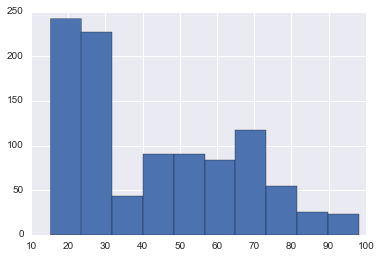

In [27]:
df.adj_close.hist()
#df.volume.hist()

## Bulk Operations

Methods like **sum( )** and **std( )** work on entire columns. We can run our own functions across all values in a column (or row) using **apply( )**.

In [ ]:
print df.date.head()

The **values** property of the column returns a list of values for the column. Inspecting the first value reveals that these are strings with a particular format.

In [28]:
print df.date.values
first_date = df.date.values[0]
print first_date

['2012-03-02' '2012-03-05' '2012-03-06' '2012-03-07' '2012-03-08'
 '2012-03-09' '2012-03-12' '2012-03-13' '2012-03-14' '2012-03-15'
 '2012-03-16' '2012-03-19' '2012-03-20' '2012-03-21' '2012-03-22'
 '2012-03-23' '2012-03-26' '2012-03-27' '2012-03-28' '2012-03-29'
 '2012-03-30' '2012-04-02' '2012-04-03' '2012-04-04' '2012-04-05'
 '2012-04-09' '2012-04-10' '2012-04-11' '2012-04-12' '2012-04-13'
 '2012-04-16' '2012-04-17' '2012-04-18' '2012-04-19' '2012-04-20'
 '2012-04-23' '2012-04-24' '2012-04-25' '2012-04-26' '2012-04-27'
 '2012-04-30' '2012-05-01' '2012-05-02' '2012-05-03' '2012-05-04'
 '2012-05-07' '2012-05-08' '2012-05-09' '2012-05-10' '2012-05-11'
 '2012-05-14' '2012-05-15' '2012-05-16' '2012-05-17' '2012-05-18'
 '2012-05-21' '2012-05-22' '2012-05-23' '2012-05-24' '2012-05-25'
 '2012-05-29' '2012-05-30' '2012-05-31' '2012-06-01' '2012-06-04'
 '2012-06-05' '2012-06-06' '2012-06-07' '2012-06-08' '2012-06-11'
 '2012-06-12' '2012-06-13' '2012-06-14' '2012-06-15' '2012-06-18'
 '2012-06-

In [29]:
datetime.strptime(first_date, "%Y-%m-%d")

datetime.datetime(2012, 3, 2, 0, 0)

In [32]:
df.date = df.date.apply(lambda d: datetime.strptime(d, "%Y-%m-%d"))
print df.date.head()

date
2012-03-02   2012-03-02
2012-03-05   2012-03-05
2012-03-06   2012-03-06
2012-03-07   2012-03-07
2012-03-08   2012-03-08
Name: date, dtype: datetime64[ns]


Each row in a DataFrame is associated with an index, which is a label that uniquely identifies a row.

The row indices so far have been auto-generated by pandas, and are simply integers starting from 0. From now on we will use dates instead of integers for indices-- the benefits of this will show later. Overwriting the index is as easy as assigning to the index property of the DataFrame.


In [30]:
df.index = df.date
print df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 2012-03-02 to 2016-02-18
Data columns (total 7 columns):
date         997 non-null object
open         997 non-null float64
high         997 non-null float64
low          997 non-null float64
close        997 non-null float64
volume       997 non-null int64
adj_close    997 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 62.3+ KB
None


#### Accessing rows of the DataFrame using index values

In [33]:
df.ix[datetime(2015,1,23,0,0)]

KeyError: datetime.datetime(2015, 1, 23, 0, 0)

#### Accessing individual rows using iloc[ ]

In [34]:
df.iloc[0,:]

date         2012-03-02 00:00:00
open                       22.01
high                          26
low                           22
close                      24.58
volume                   4809400
adj_close                  24.58
Name: 2012-03-02, dtype: object

#### Iterating over the rows using **iterrows( )**

In [35]:
num_positive_days = 0
for idx, row in df.iterrows():
    if row.close > row.open:
        num_positive_days += 1
        
print "The total number of positive-gain days : " + str(num_positive_days)

The total number of positive-gain days : 487


#### Droping a column

Now that we have made an index based on date, we can drop the actual ``date" column

In [36]:
df = df.drop(['date'],axis=1)
print df.info()
print df.columns

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 2012-03-02 to 2016-02-18
Data columns (total 6 columns):
open         997 non-null float64
high         997 non-null float64
low          997 non-null float64
close        997 non-null float64
volume       997 non-null int64
adj_close    997 non-null float64
dtypes: float64(5), int64(1)
memory usage: 54.5+ KB
None
Index([u'open', u'high', u'low', u'close', u'volume', u'adj_close'], dtype='object')


## Filtering

Selecting interesting rows from the data.  All operations below return a DataFrame, which can be treated the same way as all DataFrames we have seen so far.

In [ ]:
positive_days = df[df.close > df.open]
print positive_days.head()
print len(positive_days)

In [ ]:
very_positive_days = df[df.close-df.open > 4]
print len(very_positive_days)
#print very_positive_days.head()

In [ ]:
tmp_high = df.high > 60
print type(tmp_high)

In [ ]:
print tmp_high.head()
print len(tmp_high)

Select only the rows of **df** that correspond to **tmp_high**

In [ ]:
print df[tmp_high]

## Creating new columns

In [ ]:
df['profit'] = (df.open < df.close)
print df.head()

In [ ]:
for idx, row in df.iterrows():
    if row.close > row.open:
        df.ix[idx,'gain']='negative'
    elif (row.open - row.close) < 1:
        df.ix[idx,'gain']='small_gain'
    elif (row.open - row.close) < 6:
        df.ix[idx,'gain']='medium_gain'
    else:
        df.ix[idx,'gain']='large_gain'
print df.head()

#### Alternatively

In [ ]:
def namerow(row):
    if row.close > row.open:
        return 'negative'
    elif (row.open - row.close) < 1:
        return 'small_gain'
    elif (row.open - row.close) < 6:
        return 'medium_gain'
    else:
        return 'large_gain'

df['test_column'] = df.apply(namerow, axis = 1)


In [ ]:
print df.head()

In [ ]:
df.drop('test_column', axis = 1)

## Grouping

Besides **apply()**, another great DataFrame function is **groupby()**. It will group a DataFrame by one or more columns, and let you iterate through each group.

Here we will show the average gain among the three categories of negative, small, medium and large gains we defined above and stored in column ``gain"

In [ ]:
gains = {}
for gain, gain_data in df.groupby("gain"):
    gains[gain] = gain_data.close.mean()
gains

## Comparing multiple stocks

As a last task, we will use the experience we obtained so far -- and learn some new things -- in order to compare the performance of different stocks we obtained from Yahoo finance.

In [ ]:
stocks = ['ORCL', 'TSLA', 'IBM','YELP', 'MSFT']
attr = 'Close'
df = pd.io.data.get_data_yahoo(stocks, 
                               start=datetime(2014, 1, 1), 
                               end=datetime(2014, 12, 31))[attr]
print df.head()

In [ ]:
df.ORCL.plot(label = 'oracle')
df.TSLA.plot(label = 'tesla')
df.IBM.plot(label = 'ibm')
df.MSFT.plot(label = 'msft')
df.YELP.plot(label = 'yelp')
plt.legend(loc=5)

#### Calculating returns over a period of length T

$$r(t) = \frac{f(t)-f(t-T)}{f(t)} $$

The returns can be computed in python with a simple function **pct_returns( ) **

In [ ]:
rets = df.pct_change(30)
#print rets.head(20)

Plotting again the timeseries of the returns of the different stocks

In [ ]:
rets.ORCL.plot(label = 'oracle')
rets.TSLA.plot(label = 'tesla')
rets.IBM.plot(label = 'ibm')
rets.MSFT.plot(label = 'msft')
rets.YELP.plot(label = 'yelp')
plt.legend()

In [ ]:
plt.scatter(rets.TSLA, rets.ORCL)
plt.xlabel('Returns TESLA')
plt.ylabel('Returns ORCL')

#### Correlations of columns

The correlation coefficient between variables $X$ and $Y$ is defined as follows:
$$\text{Corr}(X,Y) = \frac{E\left[(X-\mu_X)(Y-\mu_Y)\right]}{\sigma_X\sigma_Y}$$

In python we can compute the correlation coefficient of all pairs of columns with **corr( )**

In [ ]:
corr = rets.corr()
print corr

#### Visualizing the correlation coefficient of all columns

We will learn more about visualization later, but for now this is a simple example

In [ ]:
sns.heatmap(corr, annot=True)

#### Returns vs risk (standard deviation)

In many applications, we want to know both the returns as well as the standard deviation of the returns of a stock (i.e., its risk).  Below we visualize the result of such an analysis

In [ ]:
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Standard Deviation (Risk)')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [ ]:
# Code for setting the style of the notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("../theme/custom.css", "r").read()
    return HTML(styles)
css_styling()